# Première machine learning par apprentissage supervisé


## par Classification

In [3]:
import numpy as np
import pandas as predictions
import seaborn as sns

In [4]:
titanic = sns.load_dataset('titanic')
titanic.shape
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic = titanic[['survived', 'pclass', 'sex', 'age']]
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male', 'female'], [0, 1], inplace=True)
titanic.describe()

,survived,pclass,sex,age
count,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,0.365546,29.699118
std,0.491460,0.838250,0.481921,14.526497
min,0.000000,1.000000,0.000000,0.420000
25%,0.000000,1.000000,0.000000,20.125000
50%,0.000000,2.000000,0.000000,28.000000
75%,1.000000,3.000000,1.000000,38.000000
max,1.000000,3.000000,1.000000,80.000000


In [6]:
from sklearn.model_selection import train_test_split

In [8]:
y = titanic['survived']
X = titanic.drop('survived', axis=1) #=> tout le tableau sauf la colonne survived

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (571, 3)
Test set: (143, 3)


In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, LeaveOneOut

In [90]:
cv = LeaveOneOut()
cross_val_score(KNeighborsClassifier(), X, y, cv=cv).mean()

0.7703081232492998

In [60]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

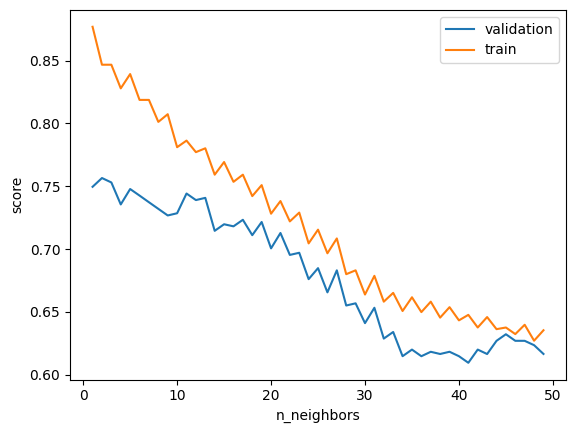

In [61]:
model = KNeighborsClassifier()
k = np.arange(1, 50)

train_score, val_score = validation_curve(model, X_train, y_train, param_name='n_neighbors',
                                            param_range= k, cv=5)
plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label="train")

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
param_grid= {'n_neighbors': np.arange(1, 20),
'metric':['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [64]:
grid.best_params_
model = grid.best_estimator_
model.score(X_test, y_test)

0.8111888111888111

In [66]:
def survie(model, pclass=3, sex=0, age=26):
    x = np.array([pclass, sex, age]).reshape(1, 3) #ne pas oublier de fixer la taille du tableau => erreur autrement
    print('Toi, tu crèves' if model.predict(x)[0] == 0 else 'Toi, tu vis')
    print(model.predict_proba(x)) #indique les pourcentages de vivre ou mourir

In [82]:
survie(model, 3, 1, 34)

Toi, tu vis
[[0.42857143 0.57142857]]


c:\environnement\.venv\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\environnement\.venv\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [83]:
from sklearn.metrics import confusion_matrix

In [84]:
confusion_matrix(y_test, model.predict(X_test))

array([[86, 10],
       [17, 30]], dtype=int64)

In [85]:
from sklearn.model_selection import learning_curve

[ 45  91 136 182 228 273 319 364 410 456]


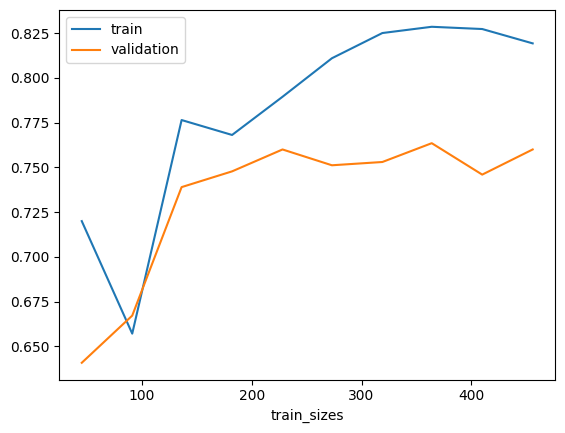

In [86]:
N, train_score, val_score = learning_curve(model, X_train, y_train,
                                            train_sizes=np.linspace(0.1, 1.0, 10), cv = 5)
print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis= 1), label='validation')
plt.xlabel('train_sizes')
plt.legend()